In [1]:
import pandas as pd
import os
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [3]:
def count_words(row):
    return len(re.findall(r'\w+', row.summary)), len(re.findall(r'\w+', row.content))

# HVG

In [4]:
df_hvg = pd.read_csv(data_path + 'hvg.csv')
df_hvg.shape

(563776, 6)

In [5]:
df_hvg.head()

,datetime,title,summary,summary_len,content,content_len
0,2019-09-09T05:59:00.0000000+02:00,Wichmann Tamás a rákkal küzd,A 71 éves kenuvilágbajnok azt üzeni mindenkine...,101,Két évvel ezelőtt kezdett fájdogálni a gyomrom...,1260
1,2008-07-23T21:08:26.0000000+02:00,KPMG: kevesebb cégfelvásárlás és fúzió,A fúziók és vállalatfelvásárlások összértékéne...,289,Simonyi szerint érzékelhetően csökken az akviz...,2527
2,2012-03-06T08:43:00.0000000+01:00,Index: milliárdos EU-bírságot kaphat Budapest,"Összesen 1,8 milliárd forint uniós bírságot ka...",179,Az Európai Bizottság körülbelül 900-900 millió...,3736
3,2013-10-19T12:39:00.0000000+02:00,Fantomgól: az újrajátszásban bízik a Hoffenheim,"A péntek este ""fantomgóllal"" vereséget szenved...",180,A 70. percben Stefan Kiessling fejese - a tele...,825
4,2013-03-05T17:33:00.0000000+01:00,Óriási büntetést kapott az ittasan vezető dán ...,Csillagászati pénzbüntetést kapott Nicklas Ben...,211,"A sérüléssel bajlódó, 25 éves Juventus-csatár ...",621


In [6]:
summary_word_counts, content_word_counts = [], []
for _, row in tqdm(df_hvg.iterrows(), total=df_hvg.shape[0]):
    sc, cc = count_words(row)
    summary_word_counts.append(sc)
    content_word_counts.append(cc)
df_word_counts = pd.DataFrame({'summary_word_count': summary_word_counts,
                               'content_word_count': content_word_counts})
df_hvg = pd.concat([df_hvg, df_word_counts], axis=1)

In [7]:
df_hvg['summary_ratio'] = df_hvg['summary_len'] / df_hvg['content_len']

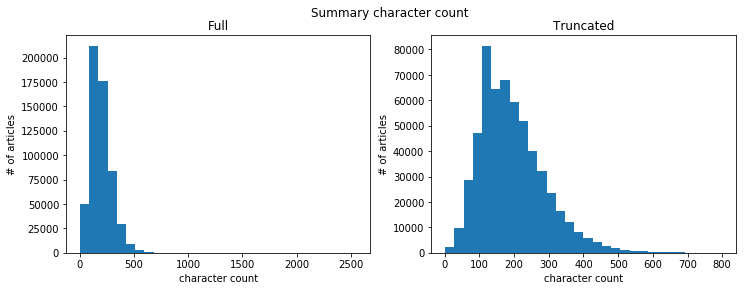

In [9]:
plt.figure(figsize=(12,4))
plt.suptitle('Summary character count')

plt.subplot(121)
plt.title('Full')
plt.xlabel('character count')
plt.ylabel('# of articles')
plt.hist(df_hvg.summary_len, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('character count')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.summary_len < 800].summary_len, bins=30);

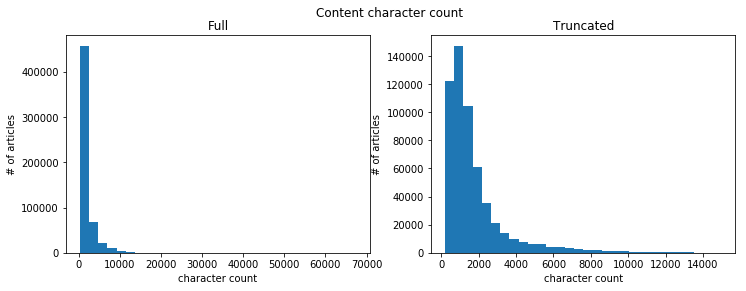

In [10]:
plt.figure(figsize=(12,4))
plt.suptitle('Content character count')

plt.subplot(121)
plt.title('Full')
plt.xlabel('character count')
plt.ylabel('# of articles')
plt.hist(df_hvg.content_len, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('character count')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.content_len < 15000].content_len, bins=30);

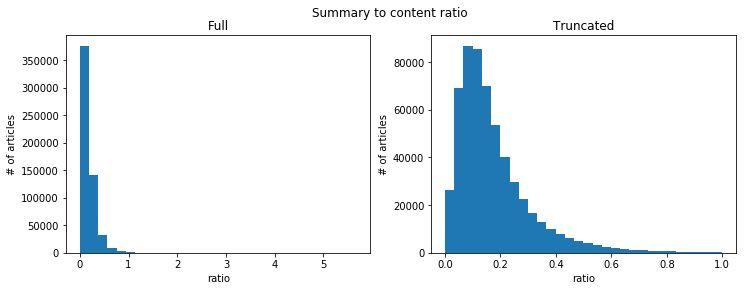

In [11]:
plt.figure(figsize=(12,4))
plt.suptitle('Summary to content ratio')

plt.subplot(121)
plt.title('Full')
plt.xlabel('ratio')
plt.ylabel('# of articles')
plt.hist(df_hvg.summary_ratio, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('ratio')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.summary_ratio < 1.].summary_ratio, bins=30);

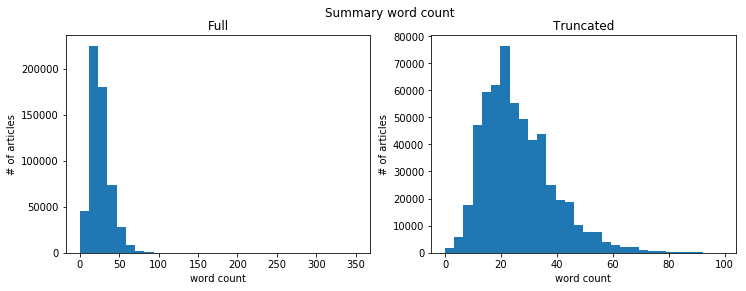

In [12]:
plt.figure(figsize=(12,4))
plt.suptitle('Summary word count')

plt.subplot(121)
plt.title('Full')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg.summary_word_count, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.summary_word_count < 100].summary_word_count, bins=30);

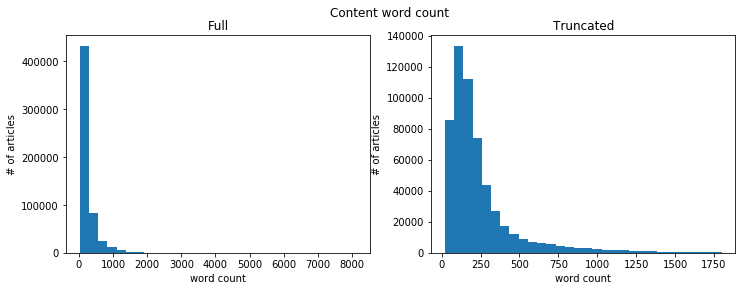

In [13]:
plt.figure(figsize=(12,4))
plt.suptitle('Content word count')

plt.subplot(121)
plt.title('Full')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg.content_word_count, bins=30);

plt.subplot(122)
plt.title('Truncated')
plt.xlabel('word count')
plt.ylabel('# of articles')
plt.hist(df_hvg[df_hvg.content_word_count < 1800].content_word_count, bins=30);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


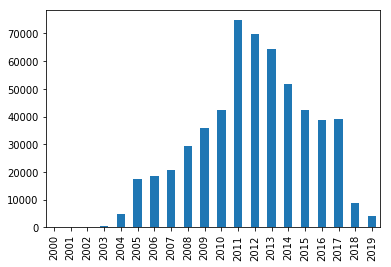

In [14]:
df_hvg.datetime = pd.to_datetime(df_hvg.datetime, utc=True)
years = df_hvg.datetime.dt.to_period('Y')
years.value_counts().sort_index().plot(kind='bar');